In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback

# import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


22:51:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=701365;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=790856;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=366468;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=867339;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

22:51:12 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=899984;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=593249;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

22:51:12 INFO      Starting 3ML!                                                                     ]8;id=730261;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=148994;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=825858;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=461842;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=29089;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=459603;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=468433;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=256879;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=735704;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=634386;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=165852;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=76481;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

22:51:13 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=203542;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=515080;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=75342;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759034;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=292210;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=946526;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:51:13 WARNING   No fermitools installed                                              ]8;id=768603;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=186058;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 409.10it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 35.63it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 35.63it/s]   

Yourlib init successfully!!!


In [58]:
%matplotlib inline
#####   Data Initialize


maptree = "../../data/KM2A1234full_skymap_rcy.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"
response = "../../data/KM2A1234full_mcpsfnewfix13.root"

region_name="Diffuse_KM2A_case1"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm([40])): #15 #range(20,360,10)
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 7.0
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()
    KM2A.psf_integration_method="exact"


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=20, rtindex=10, rtp=5,  detector="KM2A", roi=roi, pf=True, sf=True, kf=False, indexf=False, mkf=False, mindexf=False) #, fixall=True,  , Kscale= 1e-25 #, indexb=(-5.5, -1.5)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, piv=50, name=region_name, ifreturnratio=True, indexb=(-5, -1), index=-3, kbratio=100 #, K=5e-16  Kb=(1e-17, 1e-14),
                ) # , , Kn=1e-25
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50)
    import matplotlib as mpl

    x_Max=10000.
    x_Min=1
    y_Min=0.2e-15
    y_Max=1e-9
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


17:35:08 INFO      Region of Interest:                                                                   ]8;id=330603;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=300646;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=324976;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=841994;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (286.095, 6.287), model radius: 7.500 ]8;id=747159;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=798249;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 7.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=905740;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=213032;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=478226;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=431713;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=157734;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=791976;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=320574;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=254555;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=681168;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=139269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=224799;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=821476;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=554539;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=262530;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=375728;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=570354;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=809714;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=82646;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsfnewfix13                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=199758;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=925118;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=35391;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=412084;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=55446;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=997008;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=648715;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=227855;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=33729;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=353968;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,4.945588e+05,4.914533e+05,1.006319,30462,99.869387
1,1,1024,RING,2.190529e+06,2.166272e+06,1.011197,30462,99.869387
2,2,1024,RING,2.024008e+06,1.984553e+06,1.019881,30462,99.869387
3,3,1024,RING,7.011795e+05,6.762147e+05,1.036918,30462,99.869387
4,4,1024,RING,6.139265e+04,5.279565e+04,1.162835,30462,99.869387
5,5,1024,RING,1.319086e+04,9.003487e+03,1.465083,30462,99.869387
6,6,1024,RING,7.239654e+03,4.613361e+03,1.569280,30462,99.869387
7,7,1024,RING,1.942301e+03,8.992171e+02,2.159992,30462,99.869387
8,8,1024,RING,6.117919e+02,2.490885e+02,2.456122,30462,99.869387
9,9,1024,RING,2.330879e+02,9.129735e+01,2.553064,30462,99.869387


         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=11807;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=123626;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=277917;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=13943;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=505561;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=280478;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=43253;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=356410;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=476193;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=977394;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=307792;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=735353;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

17:35:09 INFO      J1848M0001u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=259390;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=736480;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=641535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=612289;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.64e-16 kb=(1.64e-18, 3.64e-16) index=-2.75 indexb=(-3.45,-2.05)                             

         INFO      Mor: fitrange=0.20                                                                  ]8;id=86734;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=257521;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J1850M0004u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=759158;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=5020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=99318;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=709679;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.86e-16 kb=(1.86e-18, 4.26e-16) index=-3.15 indexb=(-4.05,-2.25)                             

         INFO      Mor:                                                                                ]8;id=431723;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=395275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.21 sb=(0.06,0.36) fitrange=0.35                                                         

         INFO      J1852P0050u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=767703;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=50985;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=328969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=957708;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=3.22e-16 kb=(3.22e-18, 7.62e-16) index=-3.64 indexb=(-4.84,-2.44)                             

         INFO      Mor:                                                                                ]8;id=580388;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=341036;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.85 sb=(0.55,1.15) fitrange=1.30                                                         

         INFO      J1857P0203u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=1323;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=638902;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=429941;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=234422;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.78e-16 kb=(1.78e-18, 3.78e-16) index=-3.31 indexb=(-4.31,-2.31)                             

         INFO      Mor:                                                                                ]8;id=321963;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=712902;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.28 sb=(0.13,0.43) fitrange=0.35                                                         

         INFO      J1858P0330 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=213420;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=672076;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=251270;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=940492;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.56e-16 kb=(1.56e-18, 3.56e-16) index=-3.78 indexb=(-5.28,-2.28)                             

         INFO      Mor:                                                                                ]8;id=37187;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=22352;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.43 sb=(0.23,0.63) fitrange=0.60                                                         

         INFO      J1908P0615u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=287343;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=656536;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=630483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=414759;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=6.86e-16 kb=(6.86e-18, 1.01e-15) index=-2.82 indexb=(-3.12,-2.52)                             

         INFO      Mor:                                                                                ]8;id=319692;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=233270;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.36 sb=(0.31,0.41) fitrange=0.15                                                         

         INFO      J1910P0516 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=738103;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=901237;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=803797;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=397100;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=5.70e-17 kb=(1.00e-18, 2.17e-16) index=-3.15 indexb=(-4.95,-1.50)                             

         INFO      Mor: fitrange=0.75                                                                  ]8;id=221545;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=736104;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J1912P1014u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=45417;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=585720;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=411486;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=839449;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.52e-16 kb=(1.52e-18, 3.52e-16) index=-3.26 indexb=(-4.36,-2.16)                             

         INFO      Mor:                                                                                ]8;id=672848;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=272232;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.50 sb=(0.30,0.70) fitrange=0.65                                                         

         INFO      J1913P0501 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=547454;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=617259;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=899981;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=888311;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.50e-17 kb=(1.00e-18, 1.65e-16) index=-3.30 indexb=(-5.10,-1.50)                             

         INFO      Mor: fitrange=0.55                                                                  ]8;id=913577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=377096;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J1914P1150u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=160240;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=521938;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=632556;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=953421;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=7.90e-17 kb=(1.00e-18, 1.99e-16) index=-3.41 indexb=(-4.71,-2.11)                             

         INFO      Mor:                                                                                ]8;id=706609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=74138;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.21 sb=(0.01,0.41) fitrange=0.45                                                         

         INFO      Set diffuse range: [31, 47] [-8, 8]                                                ]8;id=736627;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=682046;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      ra dec coner:                                                                      ]8;id=283340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=953275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (289.1237501126153, -5.346118102161174)                                            ]8;id=675548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=320694;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (296.5291083447021, 8.671403139733373)                                             ]8;id=364615;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=442162;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (282.018324697397, 16.12231323547236)                                              ]8;id=779998;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=215125;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

         INFO      (274.85999095399006, 1.9340616592345006)                                           ]8;id=5781;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=654807;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1164\1164]8;;\

17:35:10 INFO      total sr: 0.07772890321151499                                                      ]8;id=169189;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=638227;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.096060119544788e-05                                                 ]8;id=62507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=70183;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\
                  ratio: 0.0864962107600871                                                                        

         INFO      set K to: 1.5508411453547317e-12                                                   ]8;id=338572;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=820769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1205\1205]8;;\

         INFO      diffuse file path: ../../data/Diffuse_KM2A_case1_dust_bkg_template.fits            ]8;id=430743;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=960118;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1232\1232]8;;\

Model summary:
==============

                  N
Point sources     3
Extended sources  8
Particle sources  0

Free parameters (22):
--------------------

                                         value min_value max_value   
J1848M0001u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1848M0001u.spectrum.main.Powerlaw.index -2.75     -3.45     -2.05   
J1850M0004u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index -3.15     -4.05     -2.25   
J1852P0050u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index -3.64     -4.84     -2.44   
J1857P0203u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index -3.31     -4.31     -2.31   
J1858P0330.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index  -3.78     -5.28     -2.28   
J1908P0615u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index -2.82     -3.12     -2.52   
J1910P0516.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index  -3.15     -4.95      -1.5   
J1912P1014u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index -3.26     -4.36     -2.16   
J1913P0501.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1913P0501.spectrum.main.Powerlaw.index   -3.3      -5.1      -1.5   
J1914P1150u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1914P1150u.spectrum.main.Powerlaw.index -3.41     -4.71     -2.11   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -3.0      -5.0      -1.0   

                                                    unit  
J1848M0001u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0001u.spectrum.main.Powerlaw.index                  
J1850M0004u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1850M0004u.spectrum.main.Powerlaw.index                  
J1852P0050u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1852P0050u.spectrum.main.Powerlaw.index                  
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
J1913P0501.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1913P0501.spectrum.main.Powerlaw.index                   
J1914P1150u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1914P1150u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (41):
---------------------

                                                                                    value   
J1848M0001u.position.ra                                                            282.19  \
J1848M0001u.position.dec                                                            -0.02   
J1848M0001u.spectrum.main.Powerlaw.piv                                      50000000000.0   
J1850M0004u.Gaussian_on_sphere.lon0                                                282.89   
J1850M0004u.Gaussian_on_sphere.lat0                                                 -0.07   
J1850M0004u.Gaussian_on_sphere.sigma                                                 0.21   
J1850M0004u.spectrum.main.Powerlaw.piv                                      50000000000.0   
J1852P0050u.Gaussian_on_sphere.lon0                                                 2

Failed to generate proper kernel normalization: got _kernel.sum() = 0.968667; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.966004; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.989000; expected 1.0+-0.01.


17:35:10 INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=619647;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=710348;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -0.070                       ]8;id=930457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=851420;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=631300;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=184254;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 0.840                        ]8;id=585966;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=611355;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=337425;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=770861;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 2.060                        ]8;id=946590;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=564222;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=182329;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=558872;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 3.510                        ]8;id=505425;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=702218;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=348525;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=924348;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 6.260                        ]8;id=586789;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=618214;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1912P1014u           ]8;id=81169;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=351912;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 10.500                       ]8;id=998088;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=613128;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=7787;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=805230;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 11.840                       ]8;id=54686;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=44462;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=382943;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=72005;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 5.521                        ]8;id=325463;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=234471;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=165631;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=129426;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=107114;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=866427;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

roi_15-25


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_25-35


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_35-45


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_45-55


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_55-65


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_65-75


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_75-85


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_85-95
roi_95-105
roi_105-115
roi_115-125
roi_125-135
roi_135-145
roi_145-155
roi_155-165
roi_165-175
roi_175-185
roi_185-195
roi_195-205
roi_205-215
roi_215-225
roi_225-235


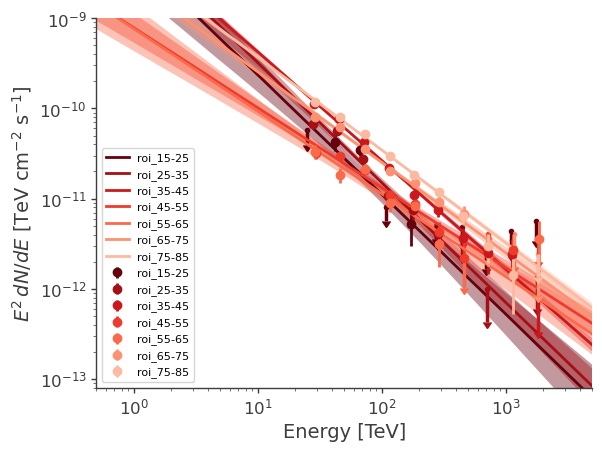

In [46]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=5000.
x_Min=0.5
y_Min=0.8e-13
y_Max=1e-9
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files): #[:7]
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(20,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/Diffuse_WCDA_case10/resultsall.npy")
        dkf = resultfile[9]
    if i < 7:
        # try:
        plot_spectra(
            resultsss,
            sources_to_use=["Diffuse"],
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit=f"TeV/(s cm2)", #*
            subplot=ax,
            plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
            )
        try:
            data = my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
        except:
            pass
        # except Exception as e:
        #     print(f"Error: {e}")
        #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

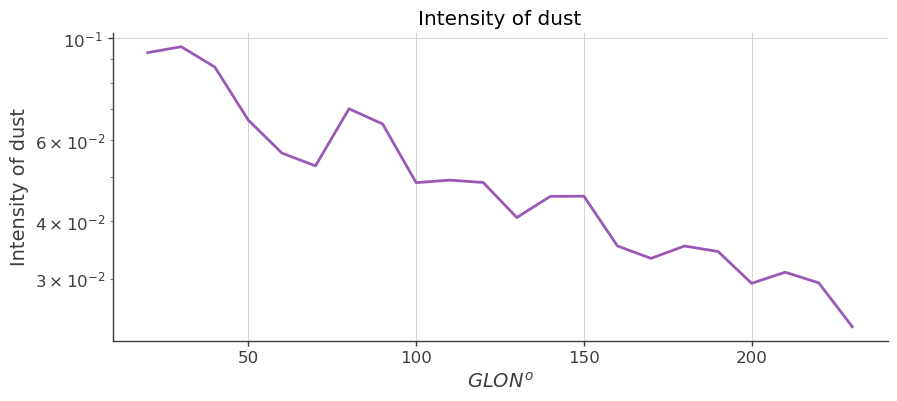

In [47]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

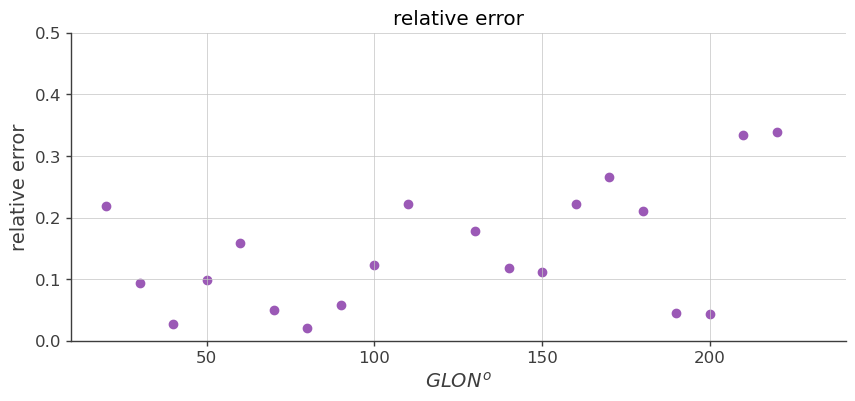

In [48]:
plt.figure(figsize=(10,4)) #
plt.scatter(gc, (np.array(de)*1e9)/(np.array(dk)*1e9), marker="o") #np.array(den)*1e9, np.array(dep)*1e9
# plt.yscale("log")
plt.title("relative error")
plt.ylim(0, 0.5)
plt.ylabel("relative error")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

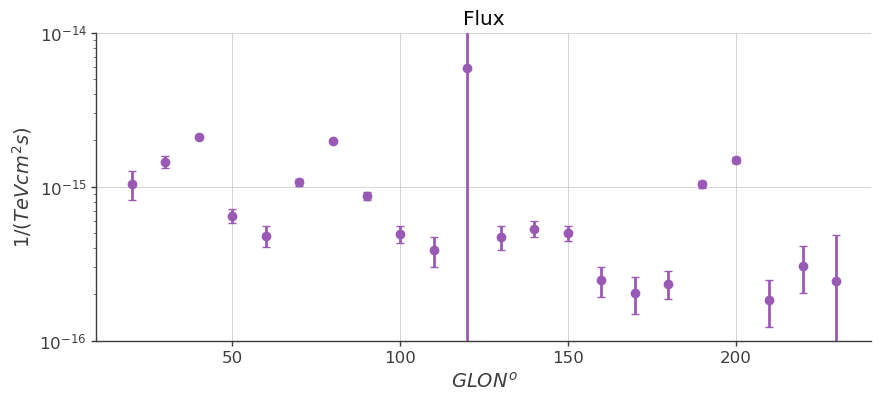

In [52]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-16, 1e-14)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

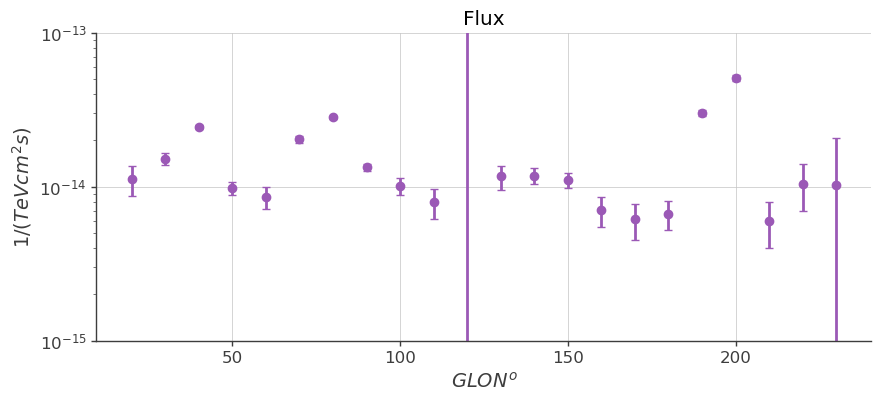

In [53]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-13)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

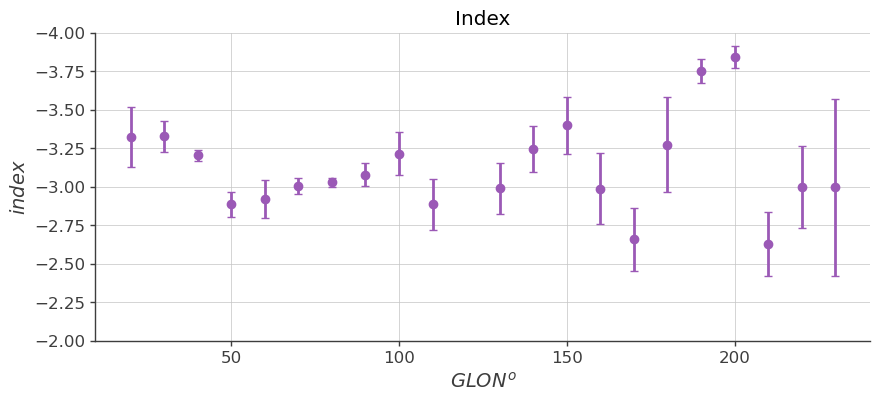

In [51]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-2,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)